In [1]:
##############################
#  Using Facebook's Prophet Library to Forecast Number of COVID19 Cases#
##############################

In [2]:
#data accessed through
#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [40]:
df = pd.read_csv('time_series_covid19_confirmed_global.txt',delimiter=',')

In [41]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [43]:
#all we need is the time-series data, do not need the first four columns in this case
df = df.iloc[:,4:]

In [44]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,0,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,0,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [45]:
#No Null Values
df.isnull().sum().sum()

0

In [46]:
#Need to restructure data so we have a sum for the total of each day
#Need to sum each column
daily_cases = df.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

Text(0.5, 1.0, 'COVID 19 Cases from 1.22.2020 to 3.27.2020')

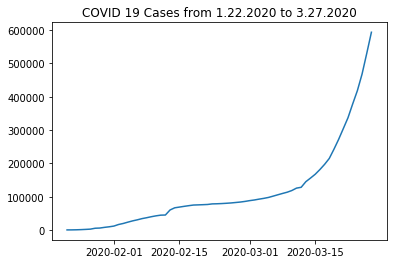

In [47]:
plt.plot(daily_cases)
plt.title("COVID 19 Cases from 1.22.2020 to 3.27.2020")

In [48]:
#Restructuring data into a dataframe
df = daily_cases.to_frame()
df.reset_index(level=0, inplace=True)
df.columns = ['Date','Confirmed Cases']
df.head()

,Date,Confirmed Cases
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [50]:
#Columns need to be changed for prophet
df.columns = ['ds','y']

In [51]:
df.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [52]:
df['ds'] = pd.to_datetime(df['ds']) #confirm datetime

In [53]:
df.info() #confirmed datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      66 non-null     datetime64[ns]
 1   y       66 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


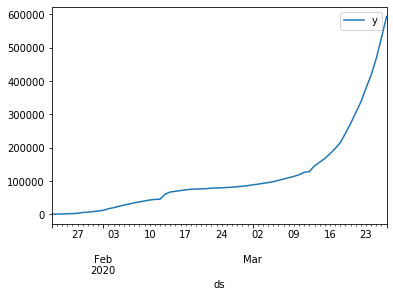

In [54]:
#General EDA
df.plot(x='ds',y='y')

In [55]:
#want to forecast last week
train = df.iloc[:59]
test = df.iloc[59:]

In [56]:
test

,ds,y
59,2020-03-21,304396
60,2020-03-22,336953
61,2020-03-23,378235
62,2020-03-24,418045
63,2020-03-25,467653
64,2020-03-26,529591
65,2020-03-27,593291


In [57]:
#Creating model instance
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
61,2020-03-23,242104.739216,224876.076770,256155.049271,241481.879818,242714.899678,-2019.531992,-2019.531992,-2019.531992,-2019.531992,-2019.531992,-2019.531992,0.0,0.0,0.0,240085.207224
62,2020-03-24,250171.707069,233970.987495,262414.226937,249160.581048,251181.035556,-1610.108646,-1610.108646,-1610.108646,-1610.108646,-1610.108646,-1610.108646,0.0,0.0,0.0,248561.598423
63,2020-03-25,258238.674922,242265.418041,272172.904717,256812.516464,259698.360267,-467.364943,-467.364943,-467.364943,-467.364943,-467.364943,-467.364943,0.0,0.0,0.0,257771.309979
64,2020-03-26,266305.642776,252266.301850,283740.702832,264357.432573,268236.546608,1926.264881,1926.264881,1926.264881,1926.264881,1926.264881,1926.264881,0.0,0.0,0.0,268231.907657
65,2020-03-27,274372.610629,264340.949403,295271.765656,271731.214872,276901.243134,5328.522364,5328.522364,5328.522364,5328.522364,5328.522364,5328.522364,0.0,0.0,0.0,279701.132993


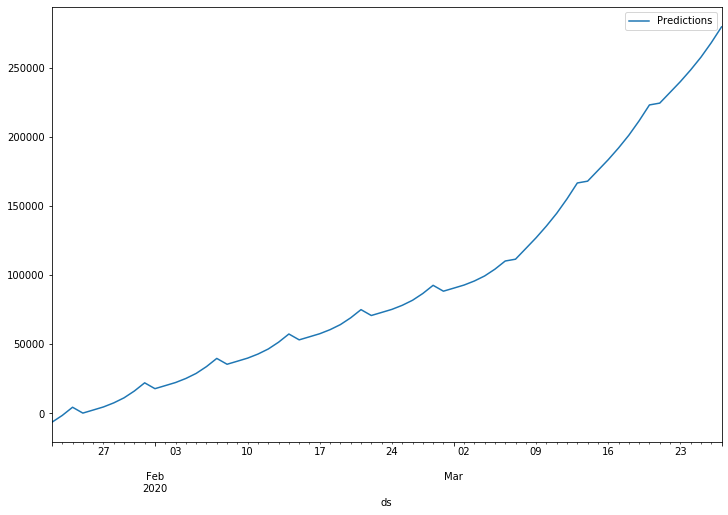

In [60]:
#Predictions Plot
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
#test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2020-03-23','2020-03-27'))

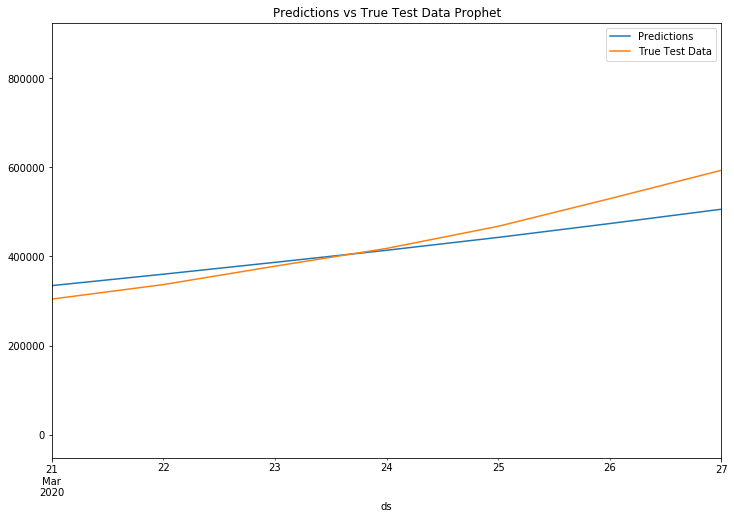

In [168]:
#Predictions vs Real Test Data
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2020-03-21','2020-03-27'))
plt.title('Predictions vs True Test Data Prophet')
plt.savefig("Predictionvs_TrueDataProphet.png")

In [65]:
#Evaluation Metrics of model
from statsmodels.tools.eval_measures import rmse

In [66]:
predictions = forecast.iloc[-7:]['yhat']

In [67]:
predictions

59    224548.958829
60    232301.834379
61    240085.207224
62    248561.598423
63    257771.309979
64    268231.907657
65    279701.132993
Name: yhat, dtype: float64

In [68]:
test['y']

59    304396
60    336953
61    378235
62    418045
63    467653
64    529591
65    593291
Name: y, dtype: int64

In [69]:
rmse(predictions,test['y']) #high rmse 

198506.8939968939

In [71]:
test.mean() #can be off by 200 thousand

y    432594.857143
dtype: float64

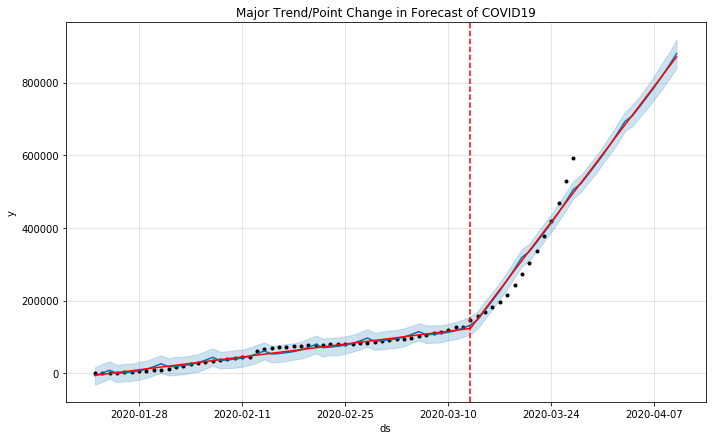

In [169]:
#Check for trend changes in data
#Highlights major points of change
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.title('Major Trend/Point Change in Forecast of COVID19')
plt.savefig('MajorTrendChanges.png')

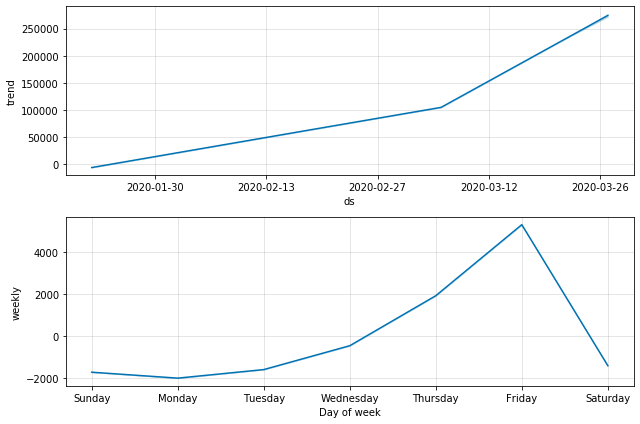

In [140]:
#Check for seasonality
fig = m.plot_components(forecast);

In [73]:
#Cross Validation
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [141]:
#INITIAL
initial = 10
initial = str(initial) + ' days'

In [142]:
initial #initial period

'10 days'

In [143]:
#PERIOD, determine number of folds
period = 10
period = str(period) + ' days'

In [144]:
period

'10 days'

In [145]:
#HORIZON, forecasting out a few days
horizon = 7
horizon = str(horizon) + ' days'

In [146]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-02-02 00:00:00 and 2020-03-13 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [147]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-03,12407.626971,10697.325841,14205.985998,19881,2020-02-02
1,2020-02-04,15057.513645,13207.753253,16813.236090,23892,2020-02-02
2,2020-02-05,17579.770511,15756.496375,19372.875775,27635,2020-02-02
3,2020-02-06,18662.445369,16844.249735,20319.786074,30794,2020-02-02
4,2020-02-07,19651.610253,17741.348023,21354.874471,34391,2020-02-02


In [148]:
performance_metrics(df_cv) #for each day out the metrics are as follows

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.989275e+08,14104.164435,10645.042049,0.160402,0.135345,0.4
1,2 days,3.437395e+08,18540.213020,13898.150476,0.181146,0.182359,0.2
2,3 days,5.635992e+08,23740.245306,16437.505016,0.187699,0.172874,0.2
3,4 days,8.731739e+08,29549.516803,20107.965923,0.208127,0.158899,0.2
4,5 days,1.303276e+09,36100.912370,24377.862568,0.230717,0.190956,0.2
5,6 days,2.187978e+09,46775.830020,29941.849178,0.245289,0.201947,0.0
6,7 days,3.347571e+09,57858.195936,35216.768399,0.247123,0.196905,0.0


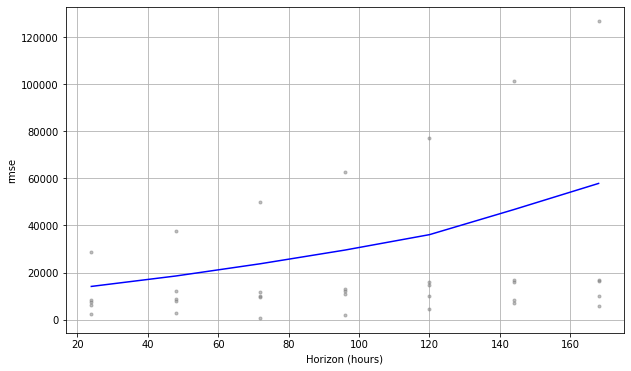

In [149]:
#RMSE Over 2 days
plot_cross_validation_metric(df_cv,metric='rmse');

In [151]:
#If we want to forecast into future have to fit the entire dataset
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [158]:
#Create a placeholder for future predictions
#forecast two weeks into the future
future = m.make_future_dataframe(periods=14)

In [159]:
future.tail() #vs

,ds
75,2020-04-06
76,2020-04-07
77,2020-04-08
78,2020-04-09
79,2020-04-10


In [160]:
df.tail()

,ds,y
61,2020-03-23,378235
62,2020-03-24,418045
63,2020-03-25,467653
64,2020-03-26,529591
65,2020-03-27,593291


In [161]:
forecast = m.predict(future)

In [162]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5958.888980,-31415.586137,16404.700588,-5958.888980,-5958.888980,-827.720664,-827.720664,-827.720664,-827.720664,-827.720664,-827.720664,0.0,0.0,0.0,-6786.609643
1,2020-01-23,-3429.150657,-23969.865966,25330.751355,-3429.150657,-3429.150657,3530.519382,3530.519382,3530.519382,3530.519382,3530.519382,3530.519382,0.0,0.0,0.0,101.368725
2,2020-01-24,-899.412334,-15163.870581,32439.949579,-899.412334,-899.412334,8972.293624,8972.293624,8972.293624,8972.293624,8972.293624,8972.293624,0.0,0.0,0.0,8072.881290
3,2020-01-25,1630.325990,-25449.466939,22743.497858,1630.325990,1630.325990,-2139.488247,-2139.488247,-2139.488247,-2139.488247,-2139.488247,-2139.488247,0.0,0.0,0.0,-509.162257
4,2020-01-26,4160.064314,-21800.631588,25674.667366,4160.064314,4160.064314,-3232.938032,-3232.938032,-3232.938032,-3232.938032,-3232.938032,-3232.938032,0.0,0.0,0.0,927.126282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2020-04-06,764095.241106,728231.253547,790259.907512,743735.467527,781965.171082,-3329.161774,-3329.161774,-3329.161774,-3329.161774,-3329.161774,-3329.161774,0.0,0.0,0.0,760766.079332
76,2020-04-07,790804.317948,754821.554753,819590.817960,767593.584034,811750.170599,-2973.504288,-2973.504288,-2973.504288,-2973.504288,-2973.504288,-2973.504288,0.0,0.0,0.0,787830.813660
77,2020-04-08,817513.394791,781421.555738,853032.613099,790982.867966,840796.599851,-827.720663,-827.720663,-827.720663,-827.720663,-827.720663,-827.720663,0.0,0.0,0.0,816685.674127
78,2020-04-09,844222.471633,810228.668983,882467.878376,814353.258508,871081.331277,3530.519382,3530.519382,3530.519382,3530.519382,3530.519382,3530.519382,0.0,0.0,0.0,847752.991015


In [163]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(14)

,ds,yhat_lower,yhat_upper,yhat
66,2020-03-28,499072.805152,545294.483259,521574.061277
67,2020-03-29,524593.392158,571390.810598,547189.688335
68,2020-03-30,548603.623867,596175.363600,573802.541435
69,2020-03-31,577656.121585,624793.557610,600867.275763
70,2020-04-01,604089.237013,655965.531383,629722.136231
71,2020-04-02,632834.999893,687111.332481,660789.453118
72,2020-04-03,666933.112352,719684.436135,692940.304202
73,2020-04-04,680418.117075,738377.708436,708537.599174
74,2020-04-05,704693.813112,762535.144189,734153.226231
75,2020-04-06,728231.253547,790259.907512,760766.079332


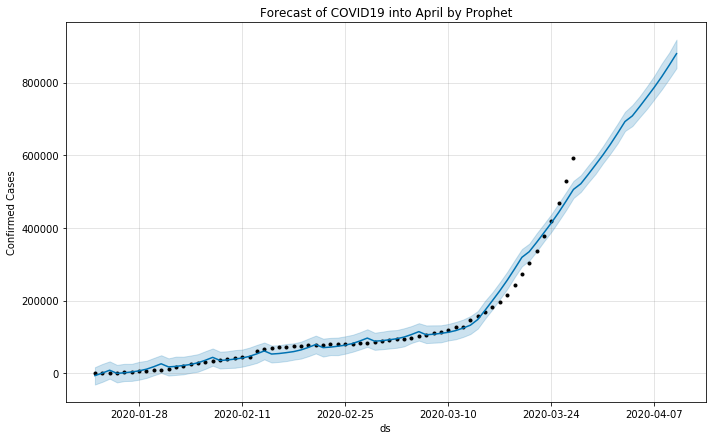

In [170]:
#Visualizing Forecast 2 weeks into future with Prophet, up to 04.10.2020
m.plot(forecast,ylabel='Confirmed Cases');
plt.title('Forecast of COVID19 into April by Prophet')
plt.savefig('ForecastCOVID19Prophet.png')